In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/RNN'
! ls

/content/gdrive/MyDrive/RNN
10-regression-algorithm.ipynb  Ex_2b.csv
Ex_1.csv		       recurrent-neural-networks-lstm-gru.ipynb
Ex_2a.csv		       USA_Housing.csv


In [3]:
!pip install -q hvplot

     |████████████████████████████████| 3.1 MB 5.7 MB/s 


# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
%matplotlib inline

# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

Output hidden; open in https://colab.research.google.com to view.

##  Check out the Data

In [5]:
USAhousing = pd.read_csv('/content/gdrive/MyDrive/RNN/Ex_1.csv')
USAhousing.head()

,Cycle,Length (mm)
0,0,10.063000
1,1,10.064609
2,2,10.066236
3,3,10.067881
4,4,10.069543


In [6]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cycle        2500 non-null   int64  
 1   Length (mm)  2500 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 39.2 KB


In [7]:
USAhousing.describe()

,Cycle,Length (mm)
count,2500.00000,2500.000000
mean,1249.50000,19.731206
std,721.83216,9.118027
min,0.00000,10.063000
25%,624.75000,12.545791
50%,1249.50000,16.551877
75%,1874.25000,24.621027
max,2499.00000,46.272091


In [8]:
USAhousing.columns

Index(['Cycle', 'Length (mm)'], dtype='object')

#  Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!

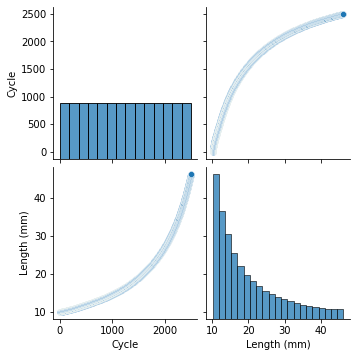

In [9]:
sns.pairplot(USAhousing)

In [15]:
USAhousing.columns

Index(['Cycle', 'Length (mm)'], dtype='object')

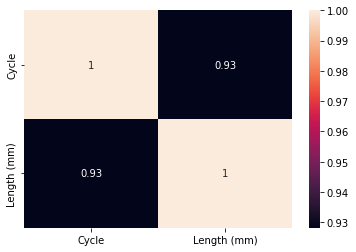

In [16]:
sns.heatmap(USAhousing.corr(), annot=True)

#  Training a Linear Regression Model

> Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Length (mm) column.

## X and y arrays

In [18]:
X = USAhousing[['Cycle']]
y = USAhousing['Length (mm)']

##  Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

#  Preparing Data For Linear Regression
> Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

> As such, there is a lot of sophistication when talking about these requirements and expectations which can be intimidating. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

> Try different preparations of your data using these heuristics and see what works best for your problem.
- **Linear Assumption.** Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
- **Remove Noise.** Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
- **Remove Collinearity.** Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
- **Gaussian Distributions.** Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
- **Rescale Inputs:** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

#  Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

##  Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [23]:
# print the intercept
print(lin_reg.intercept_)

19.802250618561413


In [24]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Cycle,8.529148


##  Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [32]:
pred = lin_reg.predict(X_test)

In [33]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

**Residual Histogram**

In [34]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

##  Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are **loss functions**, because we want to minimize them.

In [28]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 2.7739364926907424
MSE: 11.46759841505816
RMSE: 3.3863842686644645
R2 Square 0.8572345005164925
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.774724935400858
MSE: 11.53359894849411
RMSE: 3.396115273145791
R2 Square 0.8631513423082119
__________________________________


#  Robust Regression

> Robust regression is a form of regression analysis designed to overcome some limitations of traditional parametric and non-parametric methods. Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process.

> One instance in which robust estimation should be considered is when there is a strong suspicion of `heteroscedasticity`.

> A common situation in which robust estimation is used occurs when the data contain outliers. In the presence of outliers that do not come from the same data-generating process as the rest of the data, least squares estimation is inefficient and can be biased. Because the least squares predictions are dragged towards the outliers, and because the variance of the estimates is artificially inflated, the result is that outliers can be masked. (In many situations, including some areas of geostatistics and medical statistics, it is precisely the outliers that are of interest.)

## Random Sample Consensus - RANSAC

> Random sample consensus (`RANSAC`) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates. Therefore, it also can be interpreted as an outlier detection method.

> A basic assumption is that the data consists of "inliers", i.e., data whose distribution can be explained by some set of model parameters, though may be subject to noise, and "outliers" which are data that do not fit the model. The outliers can come, for example, from extreme values of the noise or from erroneous measurements or incorrect hypotheses about the interpretation of data. RANSAC also assumes that, given a (usually small) set of inliers, there exists a procedure which can estimate the parameters of a model that optimally explains or fits this data.

In [29]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.4472859648868446
MSE: 16.358181337152832
RMSE: 4.044524859257615
R2 Square 0.7963493449357444
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.577611213864602
MSE: 17.28339728217941
RMSE: 4.157330547620601
R2 Square 0.7949287356893083
__________________________________


#  Ridge Regression

> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

> Ridge regression addresses some of the problems of **Ordinary Least Squares** by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2$$

> $\alpha>=0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

> Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.
***

In [35]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.678741032328666
MSE: 11.59792061515057
RMSE: 3.405571995296909
R2 Square 0.8556120584569981
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.709752239047218
MSE: 11.746152221771265
RMSE: 3.4272659981056717
R2 Square 0.8606293515344845
__________________________________


#  LASSO Regression

> A linear model that estimates sparse coefficients.

> Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

> The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha \big|\big|w\big|\big|_1$ added, where $\alpha$ is a constant and $\big|\big|w\big|\big|_1$ is the $\ell_1-norm$ of the parameter vector.
***

In [36]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.7499540961163476
MSE: 11.460975161073076
RMSE: 3.385406203260264
R2 Square 0.8573169565050233
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.757870012874049
MSE: 11.54359894849411
RMSE: 3.3975872245601155
R2 Square 0.863032690135284
__________________________________


#  Elastic Net

> A linear regression model trained with L1 and L2 prior as regularizer. 
> This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 
> Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.
> A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.
> The objective function to minimize is in this case

$$\min_{w}{\frac{1}{2n_{samples}} \big|\big|X w - y\big|\big|_2 ^ 2 + \alpha \rho \big|\big|w\big|\big|_1 +
\frac{\alpha(1-\rho)}{2} \big|\big|w\big|\big|_2 ^ 2}$$
***

In [37]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.7336695660404353
MSE: 11.468440541103647
RMSE: 3.3865086063826335
R2 Square 0.8572240164952389
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.746331024516308
MSE: 11.563720604559224
RMSE: 3.400547103711287
R2 Square 0.8627939423137806
__________________________________


#  Polynomial Regression
> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

***

> One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

> For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

> If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

> The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

> With this re-labeling of the data, our problem can be written

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

> We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.
***

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.9757320576586829
MSE: 1.487536682248239
RMSE: 1.2196461299279553
R2 Square 0.9814809596783275
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0028353129533842
MSE: 1.4777326769301775
RMSE: 1.2156202848464555
R2 Square 0.9824663806875658
__________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


#  Stochastic Gradient Descent

> Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

In [39]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.7459000437053924
MSE: 11.447175224753126
RMSE: 3.3833674386257733
R2 Square 0.8574887583706146
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.7516137766984987
MSE: 11.545569338961288
RMSE: 3.3978771812649864
R2 Square 0.8630093110242393
__________________________________


#  Artficial Neural Network

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
1750/1750 [==============================] - 10s 4ms/step - loss: 454.6274 - val_loss: 390.4850
Epoch 2/100
1750/1750 [==============================] - 8s 4ms/step - loss: 269.4328 - val_loss: 117.7858
Epoch 3/100
1750/1750 [==============================] - 7s 4ms/step - loss: 57.5594 - val_loss: 30.6624
Epoch 4/100
1750/1750 [==============================] - 7s 4ms/step - loss: 28.7199 - val_loss: 24.9719
Epoch 5/100
1750/1750 [==============================] - 7s 4ms/step - loss: 23.1885 - val_loss: 19.7442
Epoch 6/100
1750/1750 [==============================] - 7s 4ms/step - loss: 17.8489 - val_loss: 14.7141
Epoch 7/100
1750/1750 [==============================] - 8s 5ms/step - loss: 13.0208 - val_loss: 10.3934
Epoch 8/100
1750/1750 [==============================] - 7s 4ms/step - loss: 9.0219 - val_loss: 7.3389
Epoch 9/100
1750/1750 [==============================] - 8s 5ms/step - loss: 6.7363 - val_loss: 5.5591
Epoch 10/100
1750/1750 [==============================

In [41]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [42]:
pd.DataFrame(r.history)

,loss,val_loss
0,454.627441,390.484955
1,269.432800,117.785843
2,57.559425,30.662399
3,28.719885,24.971886
4,23.188547,19.744213
...,...,...
95,1.479018,1.154387
96,1.436710,1.126362
97,1.463725,1.117537
98,1.493840,1.098261


In [43]:
pd.DataFrame(r.history).hvplot.line(y=['loss', 'val_loss'])

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [44]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.8117702063557671
MSE: 1.067614441544572
RMSE: 1.033254296649461
R2 Square 0.9867087681756648
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.8379513406608471
MSE: 1.109963787823566
RMSE: 1.0535481896067052
R2 Square 0.986830038470344
__________________________________


#  Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.008648521689512923
MSE: 0.0002811709174736125
RMSE: 0.01676815188008543
R2 Square 0.9999964995716609
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0031039037739756126
MSE: 2.4620094211833794e-05
RMSE: 0.004961863985624132
R2 Square 0.9999997078772324
__________________________________


#  Support Vector Machine

In [46]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.0720216745445634
MSE: 0.007852287920839637
RMSE: 0.08861313627696311
R2 Square 0.9999022431928175
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0687554409671873
MSE: 0.0070963441307804595
RMSE: 0.08423980134580364
R2 Square 0.9999158003349039
__________________________________


In [47]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,2.773936,11.467598,3.386384,0.857235,-82.933449
1,Robust Regression,2.447286,16.358181,4.044525,0.796349,-27.504715
2,Ridge Regression,2.678741,11.597921,3.405572,0.855612,-82.933449
3,Lasso Regression,2.749954,11.460975,3.385406,0.857317,-82.857515
4,Elastic Net Regression,2.733670,11.468441,3.386509,0.857224,-82.894985
5,Polynomail Regression,0.975732,1.487537,1.219646,0.981481,0.000000
6,Stochastic Gradient Descent,2.745900,11.447175,3.383367,0.857489,0.000000
7,Artficial Neural Network,0.811770,1.067614,1.033254,0.986709,0.000000
8,Random Forest Regressor,0.008649,0.000281,0.016768,0.999996,0.000000
9,SVM Regressor,0.072022,0.007852,0.088613,0.999902,0.000000


#  Models Comparison

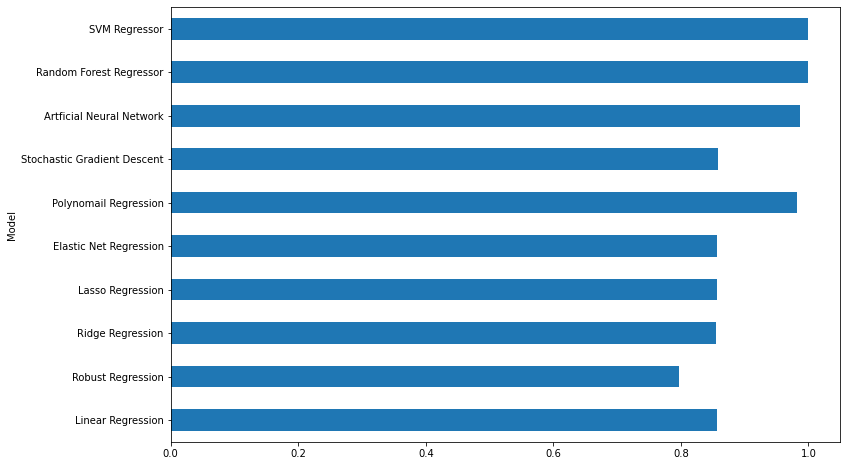

In [48]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

# 📝 Summary
In this notebook you discovered the linear regression algorithm for machine learning.

You covered a lot of ground including:
> - The common linear regression models (Ridge, Lasso, ElasticNet, ...).
> - The representation used by the model.
> - Learning algorithms used to estimate the coefficients in the model.
> - Rules of thumb to consider when preparing data for use with linear regression.
> - How to evaluate a linear regression model.

**References:**

https://www.kaggle.com/faressayah/practical-introduction-to-10-regression-algorithm?scriptVersionId=85709616